In [1]:
from graphlib import TopologicalSorter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('raw_watson_healthcare.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                1685 non-null   float64
 1   Age                       1688 non-null   int64  
 2   Attrition                 1688 non-null   object 
 3   BUSINESSTravel            1688 non-null   object 
 4   DailyRate                 1688 non-null   int64  
 5    department               1687 non-null   object 
 6   DistanceFromHome          1688 non-null   int64  
 7   Education                 1688 non-null   int64  
 8   EducationField            1686 non-null   object 
 9   EmployeeCount             1688 non-null   int64  
 10  EnvironmentSatisfaction   1688 non-null   int64  
 11  gender                    1688 non-null   object 
 12  HourlyRate                1677 non-null   float64
 13  JobInvolvement            1688 non-null   int64  
 14  JobLevel

In [4]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BUSINESSTravel', 'DailyRate',
       ' department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'Job role', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'monthly rate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'Total Working Years', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
correction = {'BUSINESSTravel': 'BusinessTravel', ' department': 'Department',
              'gender': 'Gender', 'Job role': 'JobRole',
              'monthly rate': 'MonthlyRate', 'Total Working Years': 'TotalWorkingYears'}
df = df.rename(columns=correction)
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.isna().sum()

# EmployeeID                   3
# Department                   1
# EducationField               2
# HourlyRate                  11
# JobRole                      1
# MaritalStatus                1
# StandardHours                7
# dtype: int64

EmployeeID                   3
Age                          0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   1
DistanceFromHome             0
Education                    0
EducationField               2
EmployeeCount                0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                  11
JobInvolvement               0
JobLevel                     0
JobRole                      1
JobSatisfaction              0
MaritalStatus                1
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                7
Shift                        0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInC

In [7]:
df.head(5)

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919.0,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80.0,0,8,0,1,6,4,0,5
1,1200302.0,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80.0,1,10,3,3,10,7,1,7
2,1060315.0,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80.0,0,7,3,3,0,0,0,0
3,1272912.0,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80.0,0,8,3,3,8,7,3,0
4,1414939.0,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80.0,1,6,3,3,2,2,2,2


In [8]:
df.duplicated().sum()

11

In [9]:
# clean up
# remove duplicate row
df = df.drop_duplicates()

# clean_up leading and ending spaces
df = df.replace(to_replace=r'^\s+', value='', regex= True)
df = df.replace(to_replace=r'\s+$', value='', regex= True)

# correct value: BusinessTravel 
# (Rarely -> Travel_Rarely)
df['BusinessTravel'] = df['BusinessTravel'].replace(to_replace='Rarely', value='Travel_Rarely', regex= False)

# uppercase first charracter using title
# list out all object columns
obj_cols_list = df.select_dtypes(include=['object']).columns.to_list()
for col in obj_cols_list:
    df[col] = df[col].str.title()

In [10]:
# generate data groupby
data = {}
for column in df.columns:
    data[column] = df.groupby([column, 'Attrition']).agg({'Attrition': 'count'})

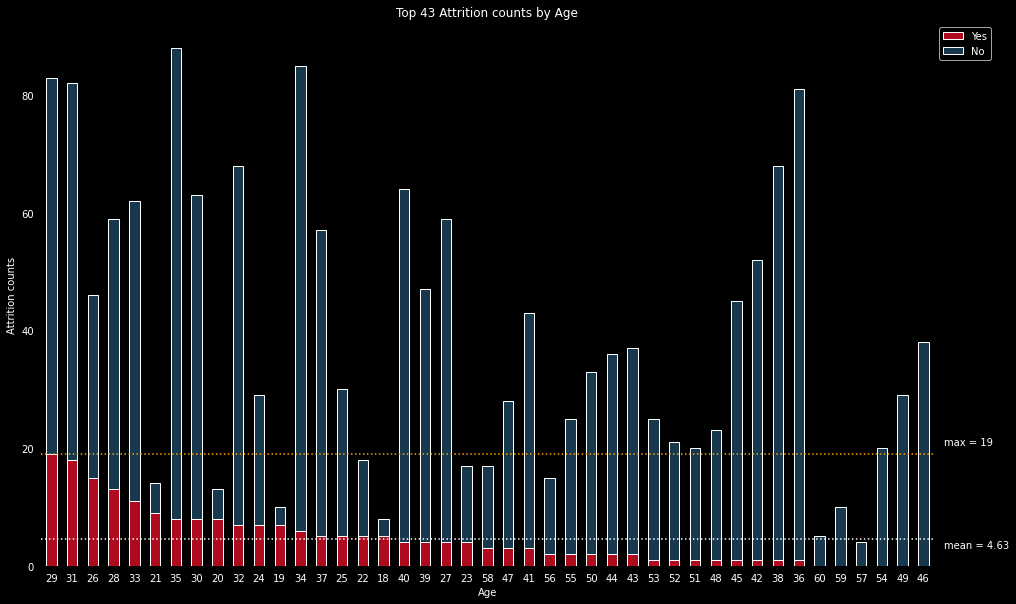

In [11]:
main = 'Age'
# prepare data for Attrition count by Age
a_age = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (16,10)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Age'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

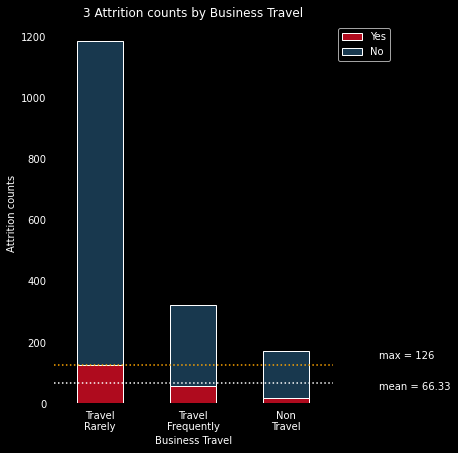

In [12]:
# prepare data for Attrition count by BusinessTravel
main = 'BusinessTravel'
a_biztravel = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (5,7)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Business Travel'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

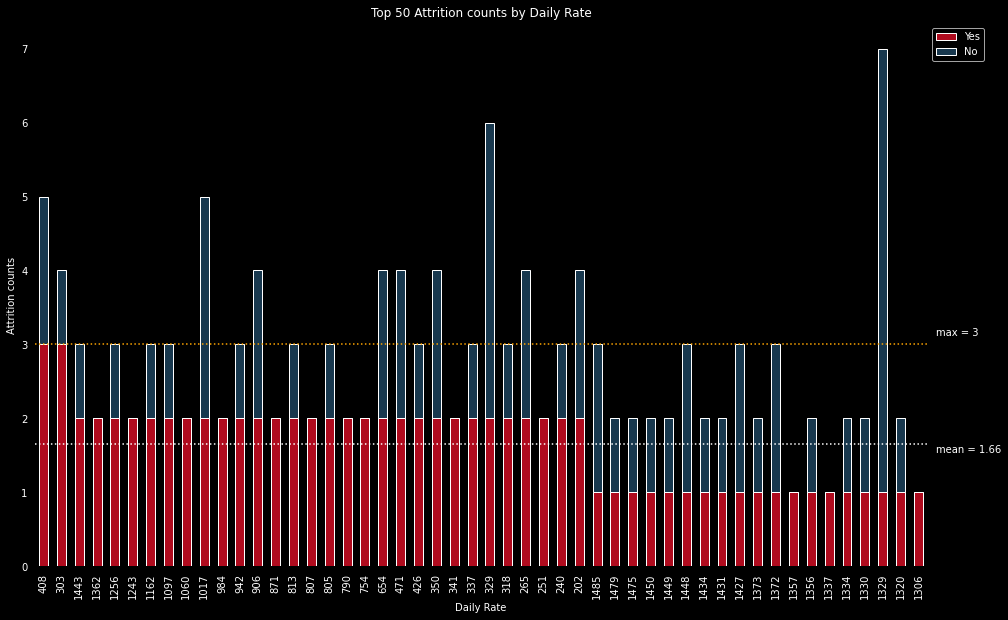

In [13]:
# prepare data for Attrition count by DailyRate
main = 'DailyRate'
a_drate = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (16,10)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 90
top_display = int(top/2)
chart_xlabel = 'Daily Rate'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))      

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

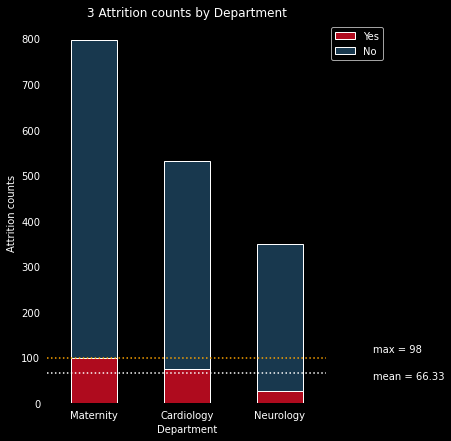

In [14]:
main = 'Department'
# prepare data for Attrition count by Department
a_dep = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (5,7)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Department'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))    

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

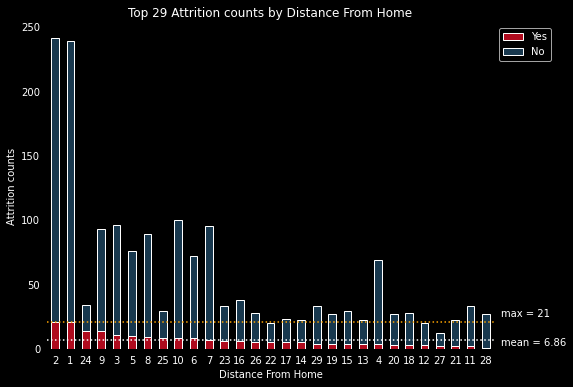

In [15]:
main = 'DistanceFromHome'
# prepare data for Attrition count by DistanceFromHome
a_distfromhome = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (8,6)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Distance From Home'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))    

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

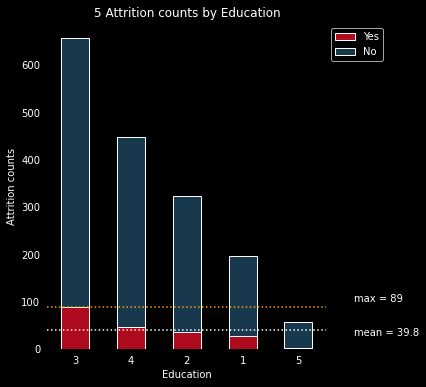

In [16]:
main = 'Education'
# prepare data for Attrition count by Education
a_edu = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (5,6)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Education'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

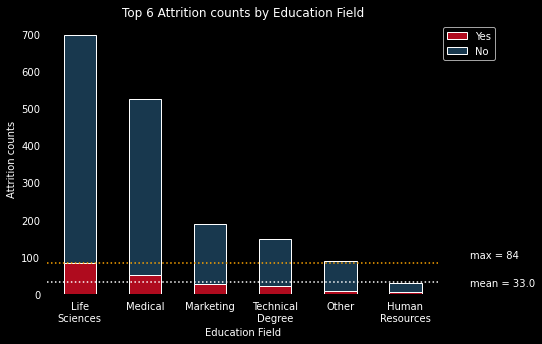

In [17]:
main = 'EducationField'
# prepare data for Attrition count by EducationField
a_edufild = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (7,5)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Education Field'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

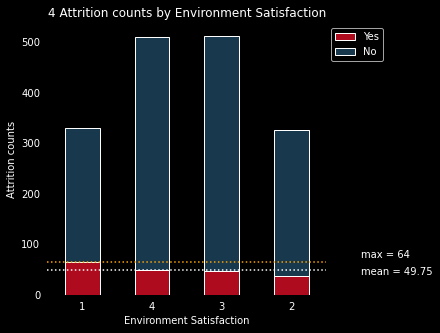

In [18]:
main = 'EnvironmentSatisfaction'
# prepare data for Attrition count by EnvironmentSatisfaction
a_envsat = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (5,5)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Environment Satisfaction'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

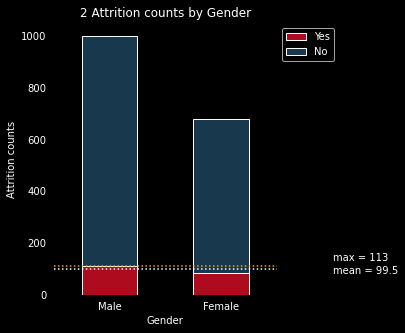

In [19]:
main = 'Gender'
# prepare data for Attrition count by Gender
a_gender = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (4,5)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Gender'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

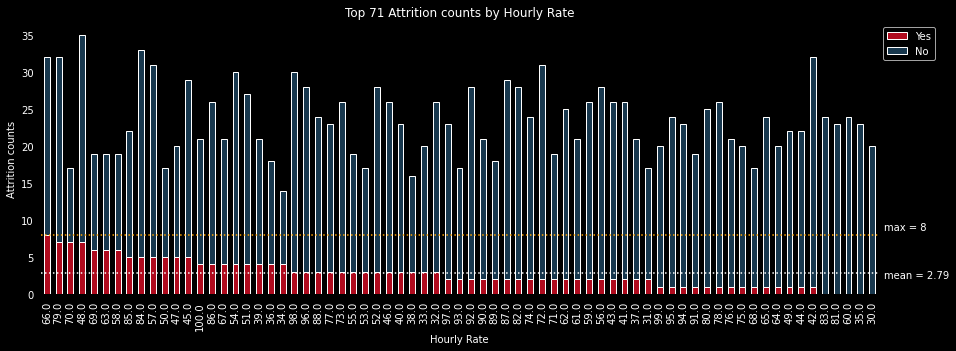

In [20]:
main = 'HourlyRate'
# prepare data for Attrition count by HourlyRate
a_hrate = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (15,5)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 90
top_display = int(top/2)
chart_xlabel = 'Hourly Rate'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

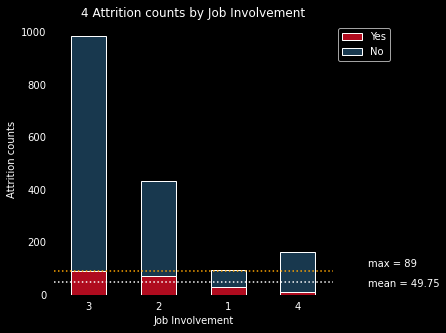

In [21]:
main = 'JobInvolvement'
# prepare data for Attrition count by JobInvolvement
a_jevol = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (5,5)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Job Involvement'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

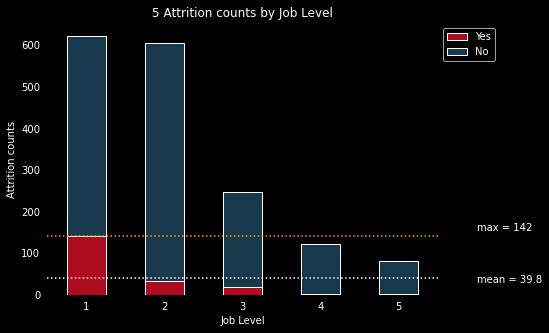

In [22]:
main = 'JobLevel'
# prepare data for Attrition count by JobLevel
a_jlevel = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (7,5)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Job Level'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

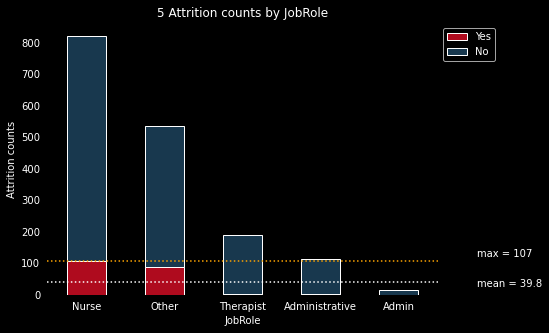

In [23]:
main = 'JobRole'
# prepare data for Attrition count by JobRole
a_jrole = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (7,5)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'JobRole'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

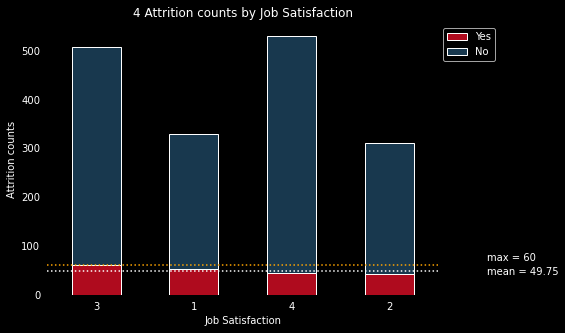

In [24]:
main = 'JobSatisfaction'
# prepare data for Attrition count by JobSatisfaction
a_jsat = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (7,5)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Job Satisfaction'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

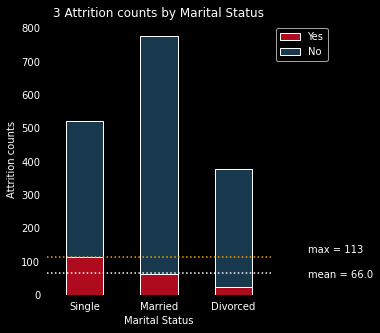

In [25]:
main = 'MaritalStatus'
# prepare data for Attrition count by MaritalStatus
a_mstat = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (4,5)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Marital Status'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

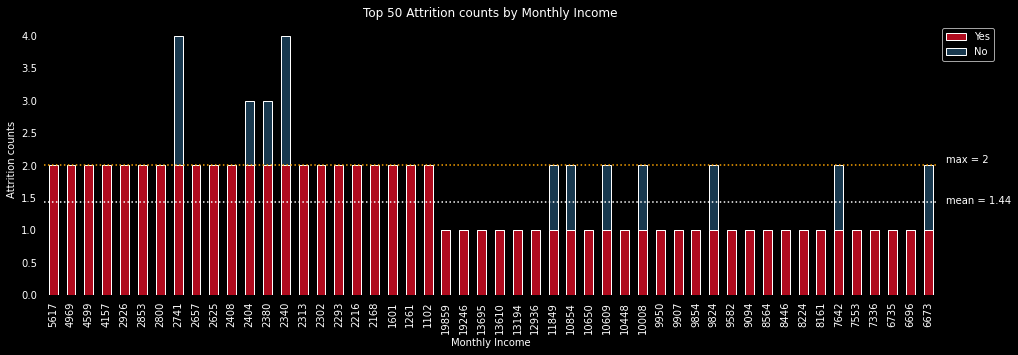

In [26]:
main = 'MonthlyIncome'
# prepare data for Attrition count by MonthlyIncome
a_income = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (16,5)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 90
top_display = int(top/2)
chart_xlabel = 'Monthly Income'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

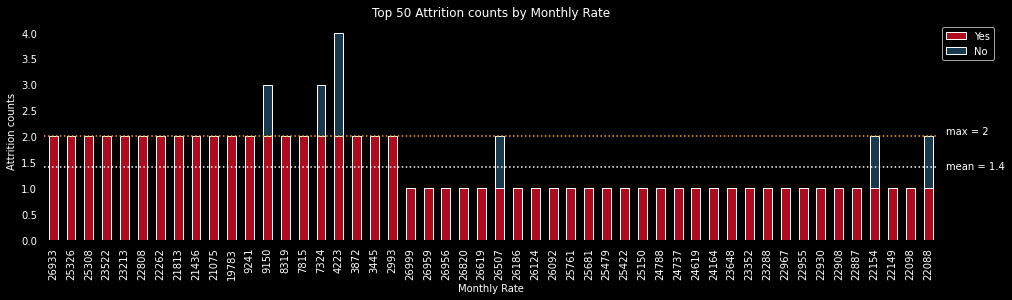

In [27]:
main = 'MonthlyRate'
# prepare data for Attrition count by MonthlyRate
a_mrate = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (16,4)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 90
top_display = int(top/2)
chart_xlabel = 'Monthly Rate'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

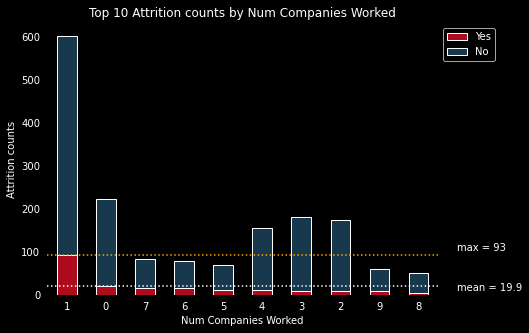

In [28]:
main = 'NumCompaniesWorked'
# prepare data for Attrition count by NumCompaniesWorked
a_nocomp = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (7,5)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Num Companies Worked'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

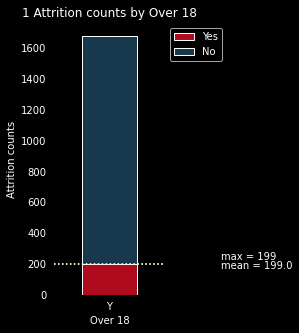

In [29]:
main = 'Over18'
# prepare data for Attrition count by Over18
a_over18 = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (2,5)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Over 18'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

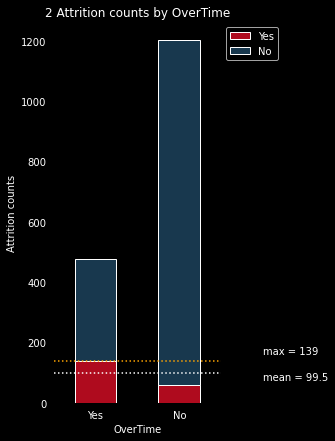

In [30]:
main = 'OverTime'
# prepare data for Attrition count by OverTime
a_ot = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (3,7)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'OverTime'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

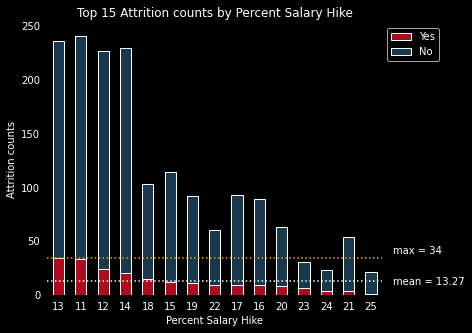

In [31]:
main = 'PercentSalaryHike'
# prepare data for Attrition count by 
a_pctsalhike = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (6,5)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Percent Salary Hike'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

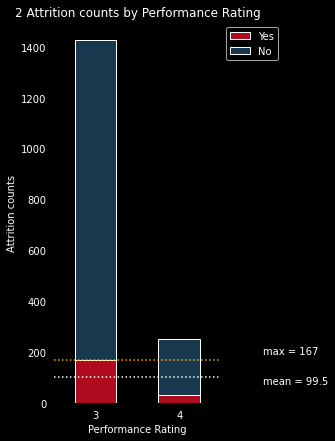

In [32]:
main = 'PerformanceRating'
# prepare data for Attrition count by PerformanceRating
a_perfrate = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (3,7)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Performance Rating'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

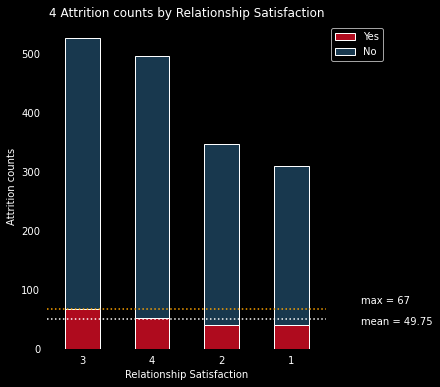

In [33]:
main = 'RelationshipSatisfaction'
# prepare data for Attrition count by 
a_relsat = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (5,6)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Relationship Satisfaction'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

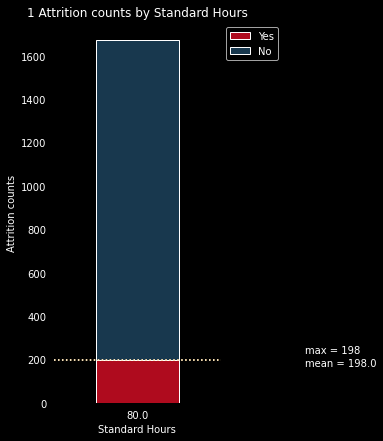

In [34]:
main = 'StandardHours'
# prepare data for Attrition count by StandardHours
a_stdhours = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (3,7)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Standard Hours'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

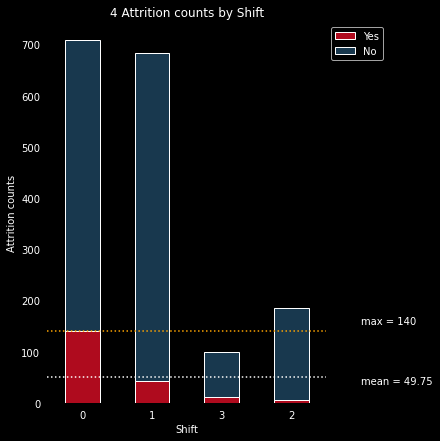

In [35]:
main = 'Shift'
# prepare data for Attrition count by Shift
a_shift = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (5,7)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Shift'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

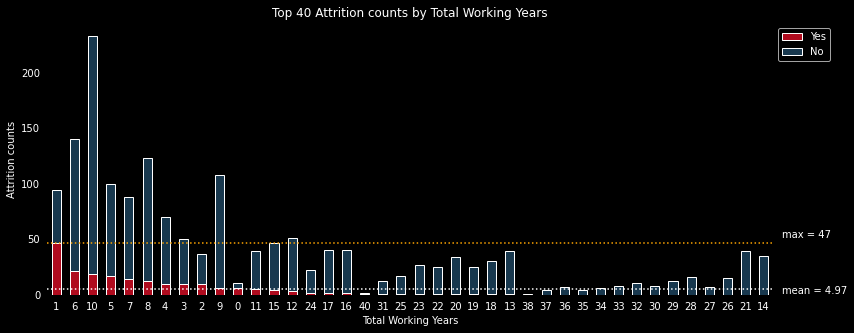

In [36]:
main = 'TotalWorkingYears'
# prepare data for Attrition count by TotalWorkingYears
a_totalworkyear = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (13,5)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Total Working Years'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

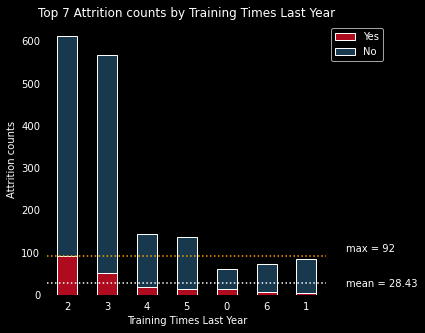

In [37]:
main = 'TrainingTimesLastYear'
# prepare data for Attrition count by TrainingTimesLastYear
a_traintimelastyear = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (5,5)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Training Times Last Year'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

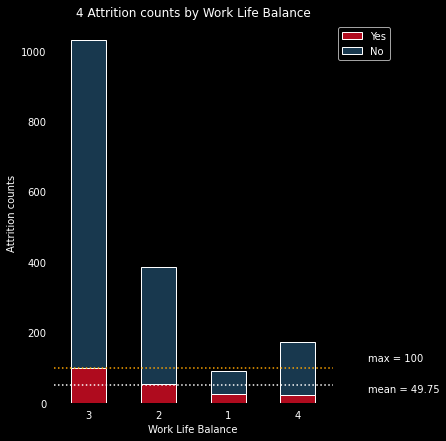

In [38]:
main = 'WorkLifeBalance'
# prepare data for Attrition count by WorkLifeBalance
a_worklifebalance = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (5,7)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Work Life Balance'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

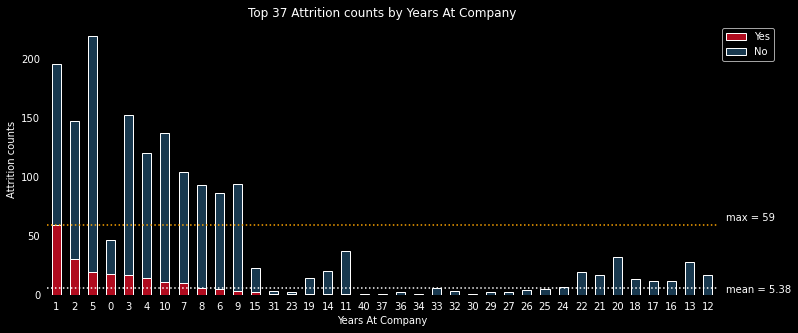

In [39]:
main = 'YearsAtCompany'
# prepare data for Attrition count by YearsAtCompany
a_yearsatcomp = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (12,5)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Years At Company'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

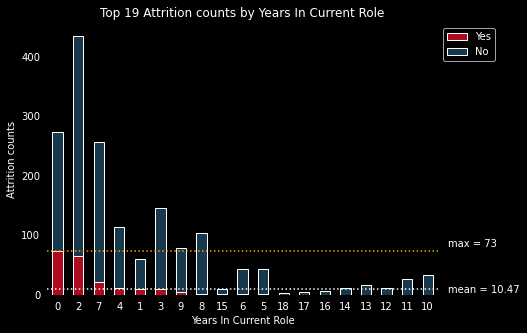

In [40]:
main = 'YearsInCurrentRole'
# prepare data for Attrition count by 
a_yearsincurrole = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (7,5)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Years In Current Role'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

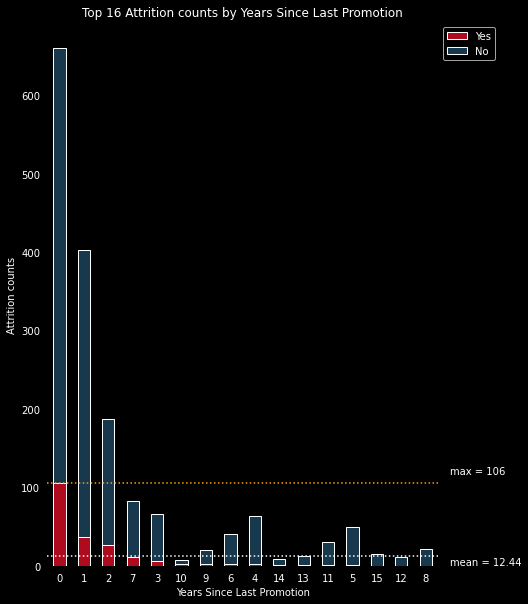

In [41]:
main = 'YearsSinceLastPromotion'
# prepare data for Attrition count by 
a_yearslastpromote = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (7,10)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Years Since Last Promotion'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()

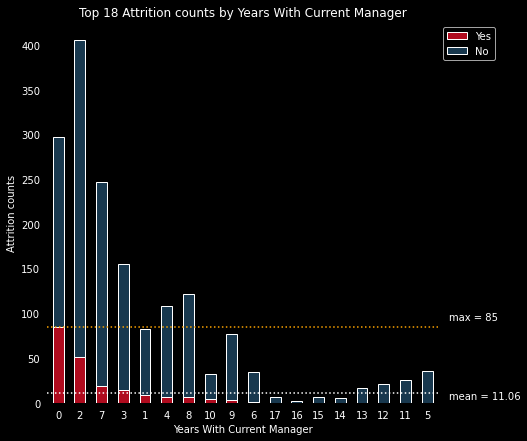

In [42]:
main = 'YearsWithCurrManager'
# prepare data for Attrition count by YearsWithCurrManager
a_yearswithcurboss = data[main]
a_chart_data = data[main]
a_y_n = a_chart_data.rename(columns={'Attrition':'Count'}).reset_index()
a_no = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])
a_yes = pd.DataFrame({main: None, 'Attrition': None,
                                        'Count': None}, index=[])

for a in set(a_y_n[main]):
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]).empty:
        a_no = pd.concat([a_no, pd.DataFrame({main: a, 'Attrition': 'No','Count': 0}, index=[1])])
    else:
        a_no = pd.concat([a_no, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'No')]])
    if (a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]).empty:
        a_yes = pd.concat([a_yes, pd.DataFrame({main: a, 'Attrition': 'Yes','Count': 0}, index=[2])])
    else:
        a_yes = pd.concat([a_yes, a_y_n[(a_y_n[main] == a) & (a_y_n['Attrition']== 'Yes')]])

a_yes1 = a_yes.copy()

# add Sort column as Yes Count
a_yes1 = a_yes1.sort_values(by=main, ignore_index=True)
a_yes = a_yes.sort_values(by=main, ignore_index=True)
a_no = a_no.sort_values(by=main, ignore_index=True)
a_yes['Sort'] = a_yes1.loc[:, 'Count']
a_no['Sort'] = a_yes1.loc[:, 'Count']

a_y_n1 = pd.concat([a_yes, a_no])

# create chart settings
if len(set(a_y_n1[main])) > 100:
    top = 100
else:
    top = len(set(a_y_n1[main]))*2
fgsize = (7,7)
bar_thick = 0.5
df_chart = a_y_n1.copy()
df_chart = df_chart.sort_values(by=['Sort', main], ascending=False, ignore_index=True).head(top)
chart_y_mean = round(df_chart['Sort'].mean(),2)
chart_y_max = df_chart['Sort'].max()
chart_max = df_chart['Count'].max()
names_rotation = 0
top_display = int(top/2)
chart_xlabel = 'Years With Current Manager'
chart_ylabel = 'Attrition counts'
if top_display > 5:
    chart_title = f'Top {top_display} {chart_ylabel} by {chart_xlabel}'
else:
    chart_title = f'{top_display} {chart_ylabel} by {chart_xlabel}'

# create yes_bar, no_bar and names list
yes_bar = df_chart.loc[df_chart['Attrition'] == 'Yes', 'Count'].to_list()
no_bar = df_chart.loc[df_chart['Attrition'] == 'No', 'Count'].to_list()
names = []
for a in df_chart[main]:
    if str(a) not in names:
        names.append(str(a))
names = [name.replace(' ', '\n') if ' ' in name else name for name in names]
names = [name.replace('_', '\n') if '_' in name else name for name in names]
names = [name.replace('-', '\n') if '-' in name else name for name in names]
r = np.arange(len(set(df_chart[main])))   

# start drawing chart
fig, ax = plt.subplots(figsize=fgsize)

ax.bar(r, yes_bar, color='#af0b1e', edgecolor='white',width= bar_thick, label = 'Yes')
ax.bar(r, no_bar, bottom = yes_bar, color='#18384e', edgecolor='white', width= bar_thick, label = 'No')

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# custom x axis
plt.xticks(r, names, rotation = names_rotation) # set the name for each Bar
ax.set_xlim(-0.5,len(r)-0.5)
ax.set_xlabel(chart_xlabel)
ax.set_ylabel(chart_ylabel)
plt.tick_params(bottom=0, left=0) # disable the tick from bottom side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add a line
ax.axline(xy1=(0,chart_y_max), xy2=(15,chart_y_max) , ls=':', color = 'orange')
ax.axline(xy1=(0,chart_y_mean), xy2=(15,chart_y_mean) , ls=':', color = 'white')

# add chart title
ax.set_title(label=chart_title)
ax.text(x=len(r), y=chart_y_max+chart_max*0.02, s=f'max = {chart_y_max}')
ax.text(x=len(r), y=chart_y_mean-chart_max*0.02, s=f'mean = {chart_y_mean}')

plt.show()